<img src="agri_image2.png" alt="Sample Image" width="900" height="200">

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

In [2]:
#Importing the data
df = pd.read_csv("co2_emissions_from_agri.csv")
#Show preview of data
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

In [3]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
# Convert year to integer
df['year'] = df['year'].astype(int)

# Convert population columns to integer
population_columns = ['rural_population', 'urban_population', 'total_population_-_male', 'total_population_-_female']
for column in population_columns:
    df[column] = df[column].astype(int)


In [5]:
# Ensure each row is a unique country-year observation
df.drop_duplicates(subset=['area', 'year'], inplace=True)

In [6]:
# Fill missing values: 0 for numeric columns, 'Unknown' for object (text) columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')
    else:
        df[column] = df[column].fillna(0)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

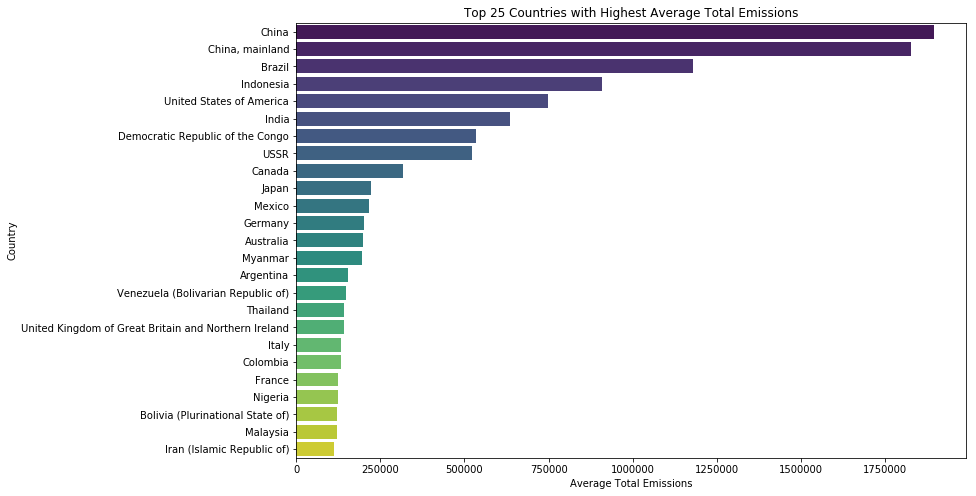

In [7]:
# Top 25 countries with highest average total emissions
avg_emissions = df.groupby('area')['total_emission'].mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette='viridis')
plt.title('Top 25 Countries with Highest Average Total Emissions')
plt.xlabel('Average Total Emissions')
plt.ylabel('Country')
plt.show()

#Top 25 Countries by Average Emissions. Identify which countries contribute most to emissions on average

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], kde=True, bins=30)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

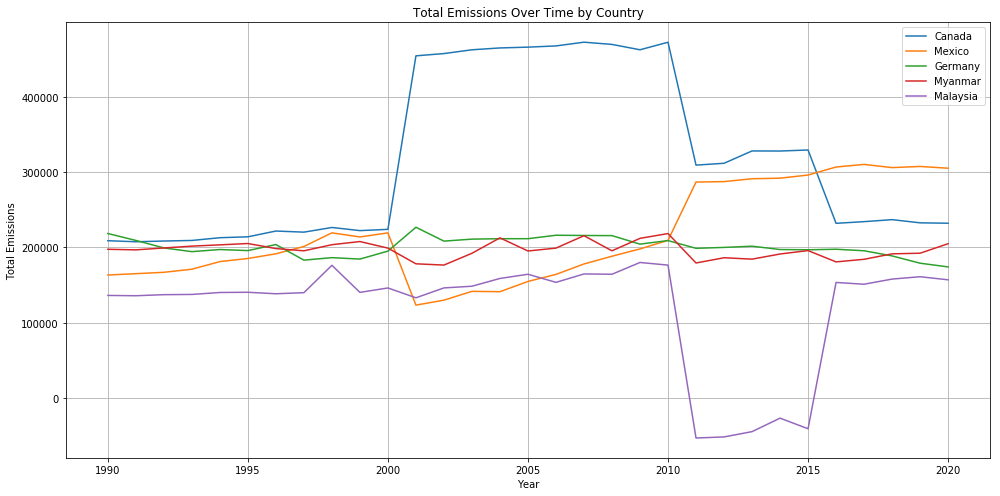

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Selected countries
selected_countries = ['Canada', 'Mexico', 'Germany', 'Myanmar', 'Malaysia']

# Plot total emissions over time
plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df[df['Area'] == country]
    plt.plot(country_data['Year'], country_data['total_emission'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Cell 6: Exploratory Data Analysis (EDA) - Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)


Summary statistics:
               Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.00

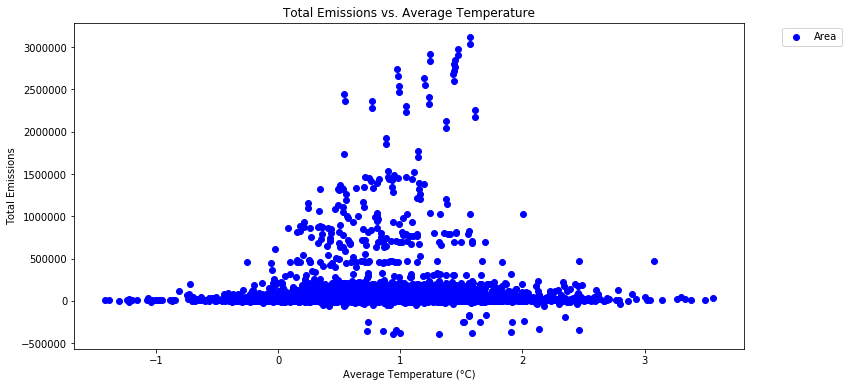

In [11]:
# Cell 9: EDA - Identify patterns (Total Emissions vs. Average Temperature)
plt.figure(figsize=(12, 6))
plt.scatter(df['Average Temperature °C'], df['total_emission'], c='blue', label='Area')
plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

In [15]:
# Feature Selection: Select relevant features for modeling
features = numeric_df.drop(columns=['total_emission'])
target = numeric_df['total_emission']

NameError: name 'numeric_df' is not defined

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Multiple Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

In [ ]:
# Decision Tree Regression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)

In [ ]:
# Random Forest Regression
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

In [ ]:
# Feature importances
tree_importances = tree_regressor.feature_importances_
forest_importances = forest_regressor.feature_importances_

# Plot feature importances
features = x.columns
indices = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), forest_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)

plt.subplot(2, 1, 2)
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X.shape[1]), tree_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate and compare model performance
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

In [ ]:
# Print model evaluation results
evaluate_model(y_test, y_pred_linear, "Multiple Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")
evaluate_model(y_test, y_pred_forest, "Random Forest Regression")

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

---
<a href=#nine></a>
## **Conclusion**
<a href=#cont>Back to Table of Contents</a>